<a href="https://colab.research.google.com/github/shoaibswe/Random-Forest/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Educational Result Analysos using Random Forest Classifier

In [1]:
from google.colab import files
files.upload()

Saving student-por.csv to student-por.csv


{'student-por.csv': b'school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3\n"GP","F",18,"U","GT3","A",4,4,"at_home","teacher","course","mother",2,2,0,"yes","no","no","no","yes","yes","no","no",4,3,4,1,1,3,4,"0","11",11\n"GP","F",17,"U","GT3","T",1,1,"at_home","other","course","father",1,2,0,"no","yes","no","no","no","yes","yes","no",5,3,3,1,1,3,2,"9","11",11\n"GP","F",15,"U","LE3","T",1,1,"at_home","other","other","mother",1,2,0,"yes","no","no","no","yes","yes","yes","no",4,3,2,2,3,3,6,"12","13",12\n"GP","F",15,"U","GT3","T",4,2,"health","services","home","mother",1,3,0,"no","yes","no","yes","yes","yes","yes","yes",3,2,2,1,1,5,0,"14","14",14\n"GP","F",16,"U","GT3","T",3,3,"other","other","home","father",1,2,0,"no","yes","no","no","yes","yes","no","no",4,3,2,1,2,5,0,"11","13",13\n"GP","M",16,"U","LE3","T",4,3,"serv

In [4]:
import pandas as pd
import sklearn 

In [5]:
df = pd.read_csv('student-por.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [6]:
df['total']= df.G1.values+df.G2.values+df.G3.values

In [7]:
print(df.G1.max())
print(df.G2.max())
print(df.G3.max())

19
19
19


In [8]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
total          int64
dtype: object

In [9]:
import numpy as np

conditions=[
            df['total'].between(48, 60),
            df['total'].between(40, 47),
            df['total'].between(32, 39),
            df['total'].between(0, 31),
            ]
val = ['Very Good', 'Satisfactory', 'Good', 'Avg']

df['Grade']= np.select(conditions,val,default ='Avg')

In [10]:
df[['total','Grade']].head(10)

,total,Grade
0,22,Avg
1,31,Avg
2,37,Good
3,42,Satisfactory
4,37,Good
5,37,Good
6,38,Good
7,36,Good
8,48,Very Good
9,37,Good


In [11]:
x = df.iloc[:,:-5]

In [12]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6


In [13]:
y=df.iloc[:,-1:]

In [14]:
y

,Grade
0,Avg
1,Avg
2,Good
3,Satisfactory
4,Good
...,...
644,Avg
645,Satisfactory
646,Good
647,Avg


In [15]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [16]:
x= le.fit_transform(x)

ValueError: ignored

So, x has numeric values, lets do separte categorical columns and apply labelencoder

In [17]:
cats = [i for i in x.columns if x.dtypes[i]=='object']
cats 

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [18]:
for i in cats:
    x[i] = le.fit_transform(df[i].astype(str))

In [19]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,0,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4
645,1,0,18,1,1,1,3,1,4,3,0,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4
646,1,0,18,1,0,1,1,1,2,2,0,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6
647,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6


In [20]:
##EXPORTING CSVS
#features=x.to_csv(r'features.csv', sep=',')
#labels=x.to_csv(r'labels.csv', sep=',')

Lets split some data fpr train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtr, xts, ytr, yts = train_test_split(x,y,test_size=.2,random_state=1)

In [ ]:
#Train Data

In [23]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [24]:
rc.fit(xtr,ytr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#test data

In [26]:
p=rc.predict(xts)

In [27]:
p

array(['Avg', 'Good', 'Avg', 'Good', 'Good', 'Avg', 'Good',
       'Satisfactory', 'Satisfactory', 'Good', 'Avg', 'Good', 'Avg',
       'Good', 'Satisfactory', 'Good', 'Avg', 'Good', 'Satisfactory',
       'Good', 'Good', 'Avg', 'Avg', 'Satisfactory', 'Good', 'Avg',
       'Satisfactory', 'Good', 'Good', 'Good', 'Avg', 'Good', 'Good',
       'Good', 'Avg', 'Avg', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Avg', 'Good', 'Satisfactory', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Avg', 'Good', 'Satisfactory', 'Good', 'Avg', 'Avg', 'Good', 'Avg',
       'Good', 'Good', 'Good', 'Good', 'Avg', 'Good', 'Avg', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Avg', 'Avg', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Avg', 'Satisfactory', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Avg', 'Good', 'Good',
       'Satisfactory', 'Good', 'Avg', 'Good', 'Avg', 'Good', 'Good',
       'Good', 'Good', 'Good', 

In [28]:
rc.predict([[0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,5]])

array(['Good'], dtype=object)

In [29]:
rc.score(xts,yts)

0.46923076923076923

In [30]:
#Oops very bad prediction. But better than decison tree

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(yts,p)

0.46923076923076923

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(confusion_matrix(yts,p))

[[26 21  2  0]
 [ 7 30  3  0]
 [ 0 23  5  0]
 [ 0 11  2  0]]


In [35]:
##its hard to understand which is what, lets do some makeup ;P

import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

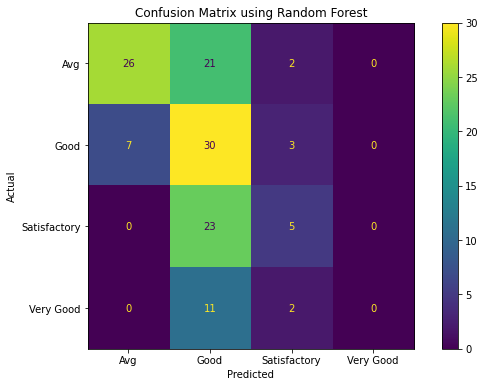

In [39]:
plot_confusion_matrix(rc,xts,yts)
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.title('Confusion Matrix using Random Forest')
plt.gcf().set_size_inches(10,6)
plt.show()

We also can see the multilabel matrix

In [40]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(yts,p)
print(mcm)

[[[ 74   7]
  [ 23  26]]

 [[ 35  55]
  [ 10  30]]

 [[ 95   7]
  [ 23   5]]

 [[117   0]
  [ 13   0]]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(yts,p))

              precision    recall  f1-score   support

         Avg       0.79      0.53      0.63        49
        Good       0.35      0.75      0.48        40
Satisfactory       0.42      0.18      0.25        28
   Very Good       0.00      0.00      0.00        13

    accuracy                           0.47       130
   macro avg       0.39      0.36      0.34       130
weighted avg       0.50      0.47      0.44       130



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
